In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from scripts.config import Config
from scripts.graph_processing import GraphProcessing

import math
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [3]:
config = Config()
graph = GraphProcessing(config)

In [4]:
graph.connect_close_nodes()

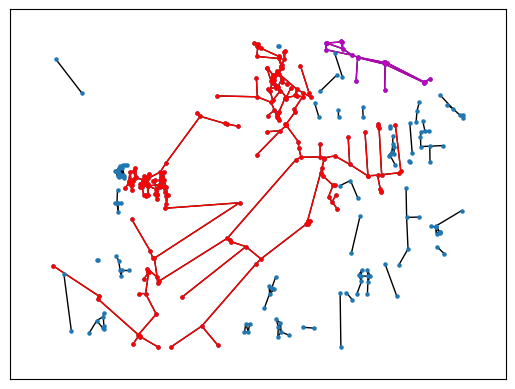

In [5]:
graph.draw_graph_with_largest_groups()

In [6]:
unfiltered_config = Config(threshold=0)
unfiltered_graph = GraphProcessing(unfiltered_config)

In [7]:
len(unfiltered_graph.nodes)

12271

In [8]:
unfiltered_graph.connect_close_nodes()

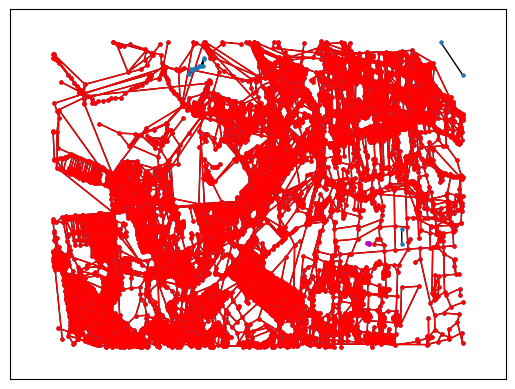

In [9]:
unfiltered_graph.draw_graph_with_largest_groups()

In [25]:
sorted_groups = graph.get_sorted_groups()
# centre = graph.model.data_fetcher.get_centre()
centre = (-2.8350, 56.3284)
largest, larger = sorted_groups[0], sorted_groups[1]
largest_centre = min(largest, key=lambda n: math.dist(graph.layout[n], centre))
larger_centre = min(larger, key=lambda n: math.dist(graph.layout[n], centre))
shortest_path = nx.shortest_path(unfiltered_graph.graph, largest_centre, larger_centre)
shortest_path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]

In [35]:
enum_edges = [(i, edge) for i, edge in enumerate(shortest_path_edges)]

In [36]:
edges_in_largest = [(i, edge) for (i, edge) in enum_edges if edge[0] in largest and edge[1] not in largest]
edges_in_larger = [(i, edge) for (i, edge) in enum_edges if edge[0] not in larger and edge[1] in larger]

In [41]:
start_index = edges_in_largest[-1][0]

In [42]:
end_index = edges_in_larger[0][0]

In [43]:
print(edges_in_largest[-1])
print(edges_in_larger[0])

(11, (297685779, 10183317370))
(20, (4060275761, 26347941))


In [46]:
cut_path = shortest_path_edges[start_index:end_index+1]

In [48]:
for edge in cut_path:
    print(edge[0] in largest, edge[0] in larger)
    print(edge[1] in largest, edge[1] in larger)

True False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False True


In [27]:
centre_point = nx.Graph()
centre_point.add_node(1, pos=centre)

In [28]:
centre_point.nodes[1]['pos']

(-2.835, 56.3284)

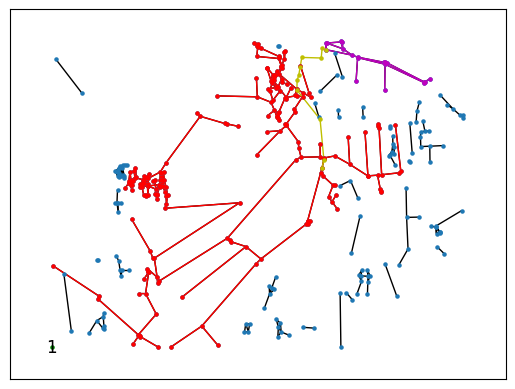

In [47]:
sorted_groups = graph.get_sorted_groups()
layout = unfiltered_graph.layout

nx.draw_networkx(graph.graph, pos=layout, with_labels=False, node_size=5)
nx.draw_networkx(graph.graph.subgraph(list(sorted_groups[0])), pos=layout, node_color='r', \
                 edge_color='r', with_labels=False,
                 node_size=5)
nx.draw_networkx(graph.graph.subgraph(list(sorted_groups[1])), pos=layout, node_color='m', \
                 edge_color='m', with_labels=False,
                 node_size=5)
nx.draw_networkx(nx.Graph(cut_path), pos=layout, node_color='y', \
                 edge_color='y', with_labels=False,
                 node_size=5)
nx.draw_networkx(centre_point, pos={1: centre}, node_color='g', node_size=5)